In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from itertools import combinations
from sklearn.metrics import classification_report, confusion_matrix, \
    accuracy_score
from sklearn.model_selection import GridSearchCV
from tslearn.neighbors import KNeighborsTimeSeriesClassifier as KNN
from tslearn.metrics import dtw

In [2]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12,
                     'axes.grid': False})

In [3]:
def plot_confusion_mtx(cm: 'confusion matrix', labels = None, 
                       figsize = (3,3), binary = False, ax=None):
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot()
    sns.heatmap(cm, annot = True, fmt = '0', annot_kws = {"fontsize": 16}, 
                cmap = "Blues", cbar = False, ax = ax)
    ax.set_xlabel('Predicted Class', fontsize = 14)
    ax.set_ylabel('Actual Class', fontsize = 14)
    if labels is None:
        labels = range(1, cm.shape[1] + 1)     
    ax.set_xticks(ax.get_xticks(), labels)
    ax.set_yticks(ax.get_yticks(), labels)
    if binary:
        ax.set_xticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
        ax.set_yticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
    return ax

---

# Load Data

In [17]:
# import all the train set files and create the 3d X_train

dir_path = './UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals'
X_train_lst = []
file_names = []
for file in os.scandir(dir_path):
    print(file.name)
    file_names.append(file.name[:-4])
    X = pd.read_fwf(file.path, header=None).values[:, :, np.newaxis]
    X_train_lst.append(X)
X_train = np.concatenate(X_train_lst, axis=2)
y_train = pd.read_fwf(".\y_train.txt", header = None)[0]

body_acc_x_train.txt
body_acc_y_train.txt
body_acc_z_train.txt
body_gyro_x_train.txt
body_gyro_y_train.txt
body_gyro_z_train.txt
total_acc_x_train.txt
total_acc_y_train.txt
total_acc_z_train.txt


In [5]:
print(X_train.shape, y_train.shape, sep='\n')

(7352, 128, 9)
(7352,)


In [6]:
# import all the test sets files and create the 3d X_test

dir_path = './UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals'
X_test_lst = []
for file in os.scandir(dir_path):
    print(file.name)
    X = pd.read_fwf(file.path, header=None).values[:, :, np.newaxis]
    X_test_lst.append(X)
X_test = np.concatenate(X_test_lst, axis=2)
y_test = pd.read_fwf(".\y_test.txt", header = None)[0]

body_acc_x_test.txt
body_acc_y_test.txt
body_acc_z_test.txt
body_gyro_x_test.txt
body_gyro_y_test.txt
body_gyro_z_test.txt
total_acc_x_test.txt
total_acc_y_test.txt
total_acc_z_test.txt


In [7]:
print(X_test.shape, y_test.shape, sep='\n')

(2947, 128, 9)
(2947,)


In [8]:
with open('activity_labels.txt') as f:
    lines = f.read().splitlines()

activities = {}
for line in lines:
    label, activity = line.split()
    activities[int(label)] = activity

In [9]:
y_train_mapped = y_train.map(activities)
y_test_mapped = y_test.map(activities)

---

# Datasets selection 

In [16]:
X_train.shape

(7352, 128, 9)

In [10]:
# using all 9 files

knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.71      0.82       496
           2       0.97      0.69      0.81       471
           3       0.99      0.35      0.52       420
           4       0.65      0.79      0.72       491
           5       0.44      0.79      0.57       532
           6       1.00      1.00      1.00       537

    accuracy                           0.74      2947
   macro avg       0.83      0.72      0.74      2947
weighted avg       0.83      0.74      0.75      2947



In [12]:
# using 6 files

knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train[:,:,:6], y_train)
y_pred = knn.predict(X_test[:,:,:6])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.69      0.81       496
           2       0.96      0.68      0.79       471
           3       0.98      0.28      0.43       420
           4       0.51      0.76      0.61       491
           5       0.49      0.64      0.55       532
           6       0.52      0.69      0.59       537

    accuracy                           0.63      2947
   macro avg       0.74      0.62      0.63      2947
weighted avg       0.72      0.63      0.63      2947



In [14]:
# using 3 files

knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train[:,:,:3], y_train)
y_pred = knn.predict(X_test[:,:,:3])

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.91      0.89       496
           2       0.93      0.84      0.88       471
           3       1.00      0.91      0.95       420
           4       0.44      0.53      0.48       491
           5       0.53      0.52      0.53       532
           6       0.70      0.65      0.68       537

    accuracy                           0.72      2947
   macro avg       0.74      0.73      0.73      2947
weighted avg       0.73      0.72      0.72      2947



In [229]:
# using 1 file at time

acc_lst_128 = []
for i in range(9):
    knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
    knn.fit(X_train[:,:,i], y_train)
    y_pred = knn.predict(X_test[:,:,i])
    print(file_names[i])
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    acc_lst_128.append(accuracy)

body_acc_x_train
              precision    recall  f1-score   support

           1       0.77      0.93      0.84       496
           2       0.69      0.73      0.71       471
           3       0.91      0.61      0.73       420
           4       0.35      0.39      0.37       491
           5       0.43      0.46      0.44       532
           6       0.60      0.50      0.54       537

    accuracy                           0.60      2947
   macro avg       0.62      0.60      0.61      2947
weighted avg       0.61      0.60      0.60      2947

body_acc_y_train
              precision    recall  f1-score   support

           1       0.69      0.72      0.70       496
           2       0.71      0.75      0.73       471
           3       0.82      0.35      0.49       420
           4       0.34      0.42      0.38       491
           5       0.32      0.31      0.31       532
           6       0.38      0.46      0.42       537

    accuracy                           0.50

Datasets with total acceleration are the ones that have a better performance

In [45]:
# using only total_acc files

knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train[:,:,6:9], y_train)
y_pred = knn.predict(X_test[:,:,6:9])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.72      0.79       496
           2       0.89      0.76      0.82       471
           3       1.00      0.75      0.85       420
           4       0.63      0.76      0.69       491
           5       0.58      0.75      0.65       532
           6       1.00      1.00      1.00       537

    accuracy                           0.79      2947
   macro avg       0.83      0.79      0.80      2947
weighted avg       0.82      0.79      0.80      2947



---

Now we do the same but using 64 timestamps

In [96]:
# create the 3d X_train with 64 timestamps

X_train_lst_64 = []
# we append the second last label (i.e 2) to the new last record
y_train_64 = pd.concat([y_train, pd.Series(2)], ignore_index = True)
for X in X_train_lst:
    last_row = X[-1:,64:]
    first64 = X[:,:64]
    X_64 = np.concatenate([first64, last_row])
    X_train_lst_64.append(X_64)
X_train_64 = np.concatenate(X_train_lst_64, axis=2)

In [97]:
X_train_64.shape

(7353, 64, 9)

In [101]:
# create the 3d X_test with 64 timestamps

X_test_lst_64 = []
# we append the second last label (i.e 2) to the new last record
y_test_64 = pd.concat([y_test, pd.Series(2)], ignore_index = True)
for X in X_test_lst:
    last_row = X[-1:,64:]
    first64 = X[:,:64]
    X_64 = np.concatenate([first64, last_row])
    X_test_lst_64.append(X_64)
X_test_64 = np.concatenate(X_test_lst_64, axis=2)

In [102]:
X_test_64.shape

(2948, 64, 9)

In [103]:
# using all 9 files

knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train_64, y_train_64)
y_pred = knn.predict(X_test_64)

In [104]:
print(classification_report(y_test_64, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.80      0.86       496
           2       0.96      0.81      0.88       472
           3       0.99      0.54      0.69       420
           4       0.70      0.80      0.75       491
           5       0.52      0.78      0.62       532
           6       1.00      1.00      1.00       537

    accuracy                           0.80      2948
   macro avg       0.85      0.79      0.80      2948
weighted avg       0.84      0.80      0.80      2948



In [105]:
# using first 6 files

knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train_64[:,:,:6], y_train_64)
y_pred = knn.predict(X_test_64[:,:,:6])

In [106]:
print(classification_report(y_test_64, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.76      0.84       496
           2       0.91      0.78      0.84       472
           3       0.99      0.41      0.58       420
           4       0.55      0.71      0.62       491
           5       0.49      0.64      0.56       532
           6       0.58      0.69      0.63       537

    accuracy                           0.67      2948
   macro avg       0.74      0.67      0.68      2948
weighted avg       0.73      0.67      0.68      2948



In [107]:
# using first 3 files

knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train_64[:,:,:3], y_train_64)
y_pred = knn.predict(X_test_64[:,:,:3])

In [108]:
print(classification_report(y_test_64, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       496
           2       0.94      0.89      0.91       472
           3       1.00      0.94      0.97       420
           4       0.44      0.50      0.47       491
           5       0.53      0.52      0.52       532
           6       0.69      0.65      0.67       537

    accuracy                           0.73      2948
   macro avg       0.75      0.74      0.75      2948
weighted avg       0.74      0.73      0.74      2948



In [230]:
# using 1 file at time
acc_lst_64 = []
for i in range(9):
    knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
    knn.fit(X_train_64[:,:,i], y_train_64)
    y_pred = knn.predict(X_test_64[:,:,i])
    print(file_names[i])
    print(classification_report(y_test_64, y_pred))
    accuracy = accuracy_score(y_test_64, y_pred)
    acc_lst_64.append(accuracy)

body_acc_x_train
              precision    recall  f1-score   support

           1       0.77      0.94      0.84       496
           2       0.71      0.72      0.72       472
           3       0.93      0.66      0.78       420
           4       0.38      0.44      0.41       491
           5       0.41      0.40      0.40       532
           6       0.54      0.49      0.51       537

    accuracy                           0.60      2948
   macro avg       0.62      0.61      0.61      2948
weighted avg       0.61      0.60      0.60      2948

body_acc_y_train
              precision    recall  f1-score   support

           1       0.68      0.70      0.69       496
           2       0.69      0.72      0.71       472
           3       0.75      0.45      0.56       420
           4       0.32      0.40      0.36       491
           5       0.39      0.36      0.38       532
           6       0.39      0.43      0.41       537

    accuracy                           0.51

In [110]:
# using only total_acc files

knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train_64[:,:,6:9], y_train_64)
y_pred = knn.predict(X_test_64[:,:,6:9])

print(classification_report(y_test_64, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.86      0.87       496
           2       0.93      0.82      0.87       472
           3       0.99      0.89      0.93       420
           4       0.69      0.76      0.72       491
           5       0.68      0.75      0.72       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2948
   macro avg       0.86      0.85      0.85      2948
weighted avg       0.86      0.85      0.85      2948



With 64 timestamps we get much better results. Moreover, the total_acc files are still those performing better.

---

Let's plot a summary graph

In [373]:
df_scores = pd.DataFrame({'dataset': [name[:-6] for name in file_names],
                          '128 timestamps': acc_lst_128, 
                          '64 timestamps': acc_lst_64})
df_scores

,dataset,128 timestamps,64 timestamps
0,body_acc_x,0.598235,0.601425
1,body_acc_y,0.498812,0.508480
2,body_acc_z,0.462165,0.476934
3,body_gyro_x,0.570750,0.513569
4,body_gyro_y,0.441805,0.446065
5,body_gyro_z,0.535120,0.527476
6,total_acc_x,0.748897,0.756106
7,total_acc_y,0.654564,0.682836
8,total_acc_z,0.541568,0.564790


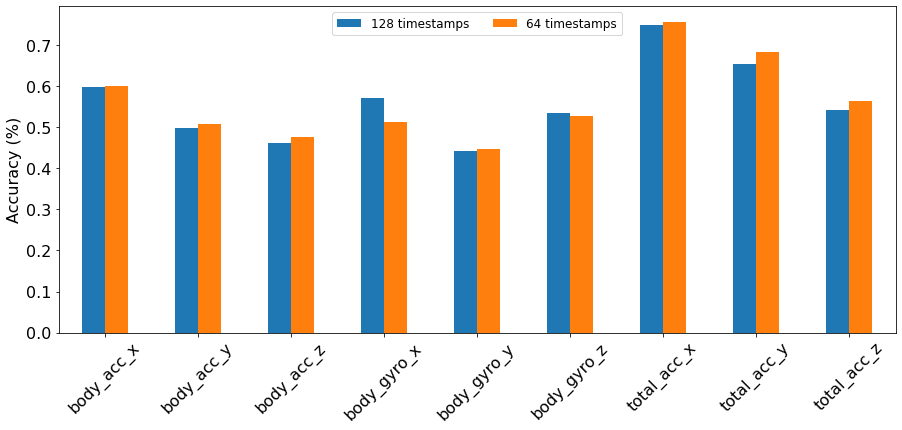

In [374]:
fig, ax = plt.subplots(figsize = (15,6))
df_scores.plot.bar(ax = ax, rot = 45, fontsize = 16)
ax.set_xticks(range(9), df_scores['dataset'])
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.legend(loc='upper center', ncol=2)
plt.show()

---

We know it is better to use files with 64 timestamps, however now the question is: which combination of files give better results? Is using all or just the total_acc files the best we can get? To answer these questions, we check the performance with every possible combination of files. Namely, there are $\sum_{i=1}^{9} {9\choose i} = 2^9 - 1=511$ possible combinations.

In [124]:
X_test_64[:,:,(0,1)].shape

(2948, 64, 2)

In [236]:
max_acc = 0
best_files = None
acc_lst = []
datasets = []
for i in range(1,10):
    for tpl in combinations(range(9), i):
        knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
        knn.fit(X_train_64[:,:,tpl], y_train_64)
        y_pred = knn.predict(X_test_64[:,:,tpl])
        accuracy = accuracy_score(y_test_64, y_pred)
        acc_lst.append(accuracy)
        datasets.append(tpl)
        if accuracy > max_acc:
            max_acc = accuracy
            best_files = tpl

In [237]:
max_acc

0.8873812754409769

In [238]:
best_files

(0, 1, 2, 5, 6, 7)

In [239]:
for idx in best_files:
    print(file_names[idx])

body_acc_x_train
body_acc_y_train
body_acc_z_train
body_gyro_z_train
total_acc_x_train
total_acc_y_train


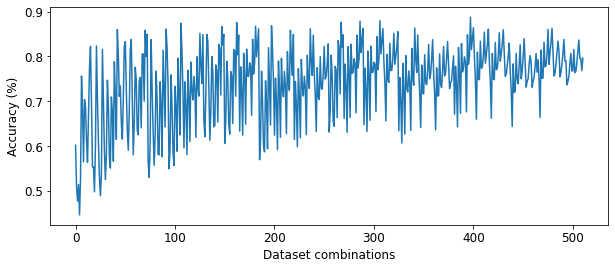

In [322]:
plt.figure(figsize=(10,4))
plt.plot(acc_lst)
plt.ylabel('Accuracy (%)')
plt.xlabel('Dataset combinations')
plt.show()

In [348]:
df_acc.loc[best_acc_idx[-10:], 'dataset'].astype(str).values

array(['(0, 1, 2, 6, 7, 8)', '(0, 1, 6, 7)', '(0, 5, 6, 7)',
       '(1, 2, 6, 7)', '(2, 6, 7)', '(0, 2, 6, 7)', '(0, 1, 2, 6, 7)',
       '(0, 1, 5, 6, 7)', '(0, 2, 5, 6, 7)', '(0, 1, 2, 5, 6, 7)'],
      dtype=object)

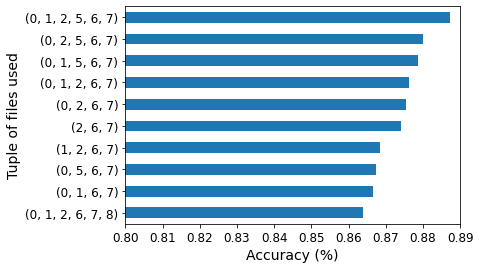

In [369]:
fig, ax = plt.subplots(figsize = (6,4))
df_acc = pd.DataFrame(dict(dataset=datasets, accuracy=acc_lst))
best_acc_idx = df_acc['accuracy'].sort_values().index 
df_acc.loc[best_acc_idx[-10:], :].plot.barh(ax = ax, legend = False)
ax.set_xlabel('Accuracy (%)', fontsize = 14)
ax.set_yticks(range(10),df_acc.loc[best_acc_idx[-10:], 'dataset'])
ax.set_ylabel('Tuple of files used', fontsize = 14)
ax.set_xlim(left=0.8, right=0.89)
plt.show()

In [267]:
df_acc.loc[best_acc_idx[-10:], :]

,dataset,accuracy
400,"(0, 1, 2, 6, 7, 8)",0.863976
147,"(0, 1, 6, 7)",0.866689
181,"(0, 5, 6, 7)",0.867368
197,"(1, 2, 6, 7)",0.868385
106,"(2, 6, 7)",0.874152
162,"(0, 2, 6, 7)",0.875509
267,"(0, 1, 2, 6, 7)",0.876187
286,"(0, 1, 5, 6, 7)",0.878562
306,"(0, 2, 5, 6, 7)",0.879919
397,"(0, 1, 2, 5, 6, 7)",0.887381


In [379]:
count_dict = dict.fromkeys(range(9), 0)
best_10 = df_acc.loc[best_acc_idx[-10:], 'dataset'].to_list()
for tpl in best_10:
    for file in tpl:
        count_dict[file] += 1

In [381]:
count_dict

{0: 8, 1: 6, 2: 7, 3: 0, 4: 0, 5: 4, 6: 10, 7: 10, 8: 1}

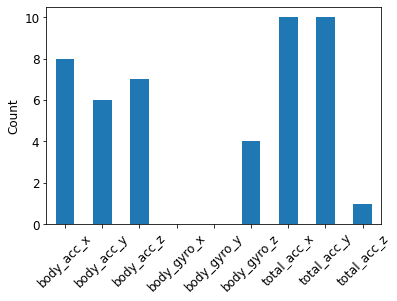

In [407]:
pd.DataFrame(dict(zip(df_scores['dataset'], count_dict.values())), 
             index= range(1)).T.plot.bar(legend=False, rot=45)
plt.ylabel('Count')
plt.show()

The barplot above shows how many times each file is used in the best 10 combinations

---

In [370]:
knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train_64[:,:,best_files], y_train_64)
y_pred = knn.predict(X_test_64[:,:,best_files])

print(classification_report(y_test_64, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.87      0.92       496
           2       0.98      0.94      0.96       472
           3       1.00      0.92      0.96       420
           4       0.74      0.79      0.77       491
           5       0.71      0.81      0.76       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2948
   macro avg       0.90      0.89      0.89      2948
weighted avg       0.90      0.89      0.89      2948



Since the class `LAYING` has 100% of accuracy we remove it from the dataset like we did in the first part of the project

In [445]:
mask = y_train_64 != 6
mask.sum()

5946

In [446]:
X_train = X_train_64[mask][:,:,best_files]
y_train = y_train_64[mask]
X_train.shape, y_train.shape

((5946, 64, 6), (5946,))

In [447]:
mask = y_test_64 != 6
mask.sum()

2411

In [448]:
X_test = X_test_64[mask][:,:,best_files]
y_test = y_test_64[mask]
X_test.shape, y_test.shape

((2411, 64, 6), (2411,))

# Classification

## KNN

In [469]:
params = {'n_neighbors': [1,3,5,7,9], 'weights': ['uniform', 'distance']}
gridsearch = GridSearchCV(KNN(metric = 'euclidean'), params, cv=5, 
                          scoring='accuracy', n_jobs=-1)

In [470]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsTimeSeriesClassifier(metric='euclidean'),
             n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [471]:
gridsearch.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [449]:
knn = KNN(n_neighbors=1, metric = 'euclidean', n_jobs = -1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.87      0.92       496
           2       0.98      0.94      0.96       472
           3       1.00      0.92      0.96       420
           4       0.74      0.79      0.77       491
           5       0.71      0.81      0.76       532

    accuracy                           0.86      2411
   macro avg       0.88      0.87      0.87      2411
weighted avg       0.87      0.86      0.87      2411



<AxesSubplot:xlabel='Predicted Class', ylabel='Actual Class'>

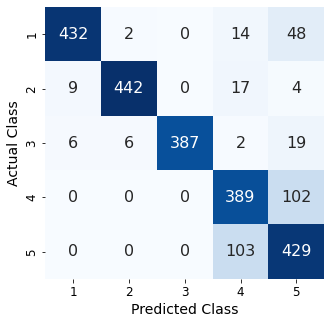

In [450]:
plot_confusion_mtx(confusion_matrix(y_test, y_pred), figsize=(5,5))

In [451]:
knn = KNN(n_neighbors=1, metric = 'cityblock', n_jobs = -1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.91      0.93       496
           2       0.98      0.94      0.96       472
           3       1.00      0.92      0.96       420
           4       0.72      0.76      0.74       491
           5       0.72      0.79      0.75       532

    accuracy                           0.86      2411
   macro avg       0.87      0.86      0.87      2411
weighted avg       0.87      0.86      0.86      2411



<AxesSubplot:xlabel='Predicted Class', ylabel='Actual Class'>

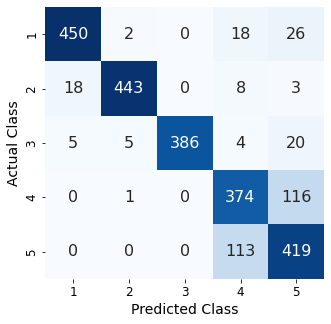

In [452]:
plot_confusion_mtx(confusion_matrix(y_test, y_pred), figsize=(5,5))

In [453]:
knn = KNN(n_neighbors=1, metric = 'dtw', n_jobs = -1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       496
           2       1.00      0.98      0.99       472
           3       1.00      0.98      0.99       420
           4       0.77      0.74      0.76       491
           5       0.77      0.79      0.78       532

    accuracy                           0.89      2411
   macro avg       0.90      0.90      0.90      2411
weighted avg       0.89      0.89      0.89      2411



<AxesSubplot:xlabel='Predicted Class', ylabel='Actual Class'>

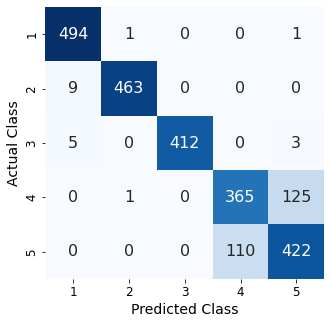

In [454]:
plot_confusion_mtx(confusion_matrix(y_test, y_pred), figsize=(5,5))

In [459]:
knn = KNN(n_neighbors=1, metric='dtw', n_jobs=-1,
          metric_params={'global_constraint': "sakoe_chiba", 
                         'sakoe_chiba_radius': 10}) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       496
           2       1.00      0.99      0.99       472
           3       1.00      0.98      0.99       420
           4       0.77      0.75      0.76       491
           5       0.77      0.80      0.78       532

    accuracy                           0.90      2411
   macro avg       0.90      0.90      0.90      2411
weighted avg       0.90      0.90      0.90      2411



<AxesSubplot:xlabel='Predicted Class', ylabel='Actual Class'>

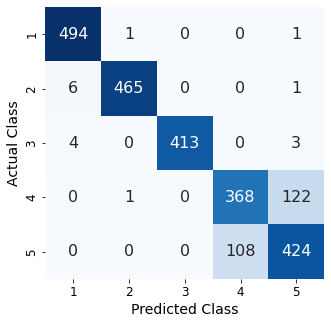

In [460]:
plot_confusion_mtx(confusion_matrix(y_test, y_pred), figsize=(5,5))

In [461]:
knn = KNN(n_neighbors=1, metric='dtw', n_jobs=-1,
          metric_params={'global_constraint': "itakura", 
                         'itakura_max_slope': 2.}) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       1.00      0.97      0.98       472
           3       1.00      0.98      0.99       420
           4       0.77      0.75      0.76       491
           5       0.77      0.80      0.78       532

    accuracy                           0.89      2411
   macro avg       0.90      0.90      0.90      2411
weighted avg       0.89      0.89      0.89      2411



<AxesSubplot:xlabel='Predicted Class', ylabel='Actual Class'>

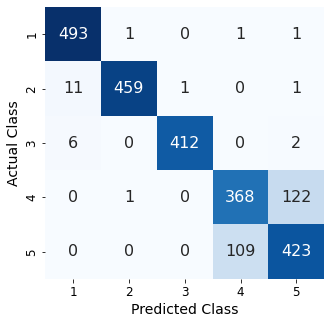

In [462]:
plot_confusion_mtx(confusion_matrix(y_test, y_pred), figsize=(5,5))

In [472]:
knn = KNN(n_neighbors=1, metric = 'sax', n_jobs = -1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       496
           2       0.00      0.00      0.00       472
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       491
           5       0.22      1.00      0.36       532

    accuracy                           0.22      2411
   macro avg       0.04      0.20      0.07      2411
weighted avg       0.05      0.22      0.08      2411



C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Predicted Class', ylabel='Actual Class'>

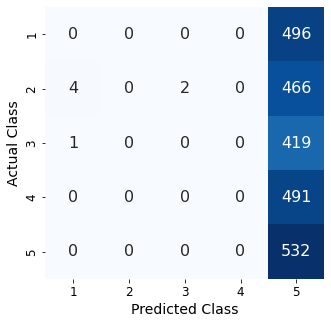

In [473]:
plot_confusion_mtx(confusion_matrix(y_test, y_pred), figsize=(5,5))

In [474]:
knn = KNN(n_neighbors=1, metric = 'ctw', n_jobs = -1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\simon\anaconda3\envs\myenv\lib\site-packages\sklearn\cross_decomposition\_pls.p

KeyboardInterrupt: 

In [ ]:
plot_confusion_mtx(confusion_matrix(y_test, y_pred), figsize=(5,5))

---